In [1]:
import os
#os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false'

import itertools
import matplotlib.cm as cm
import numpy as np
import matplotlib
# Prevent ptitprince from raising cmap errors
cm.register_cmap = lambda name, cmap : matplotlib.colormaps.register(cmap, name=name)
import ptitprince as pt


import ipywidgets as widgets
import pandas as pd
import copy

from functools import partial

from tqdm import tqdm


import matplotlib.pyplot as plt
plt.style.use('matplotlibrc')
np.set_printoptions(suppress=True)

In [2]:
runs = pd.read_csv('runs.csv', index_col=1).rename(columns={'Unnamed: 0': 'alpha'}).pivot(columns='alpha', values='logLik')
mifs = pd.read_csv('mif.csv', index_col=0)['logLik']
pres = pd.read_csv('pre.csv', index_col=0)['logLik']

In [3]:
quantiles = [0,0.5,0.8]
(-runs).quantile(quantiles).T.astype(float)

,0.0,0.5,0.8
alpha,,,
0.00,3752.538574,3793.310913,3822.102002
0.97,3749.949707,3771.823486,3786.512451
1.00,3751.114258,3781.295776,3800.448633


Text(-3875, -3755, 'A')

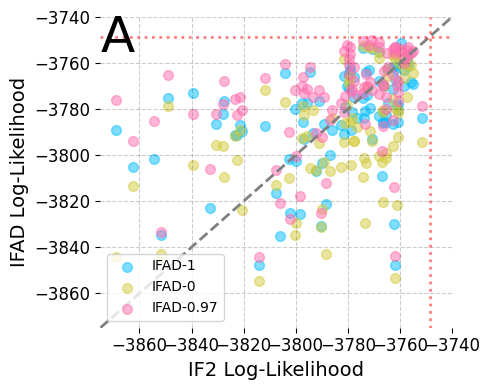

In [11]:
# IF2 0.95
plt.figure(figsize=(5,4))
# Overall paired searches, our IF2
plt.scatter(mifs, runs[1.0], marker='o', alpha=0.5,
            label='IFAD-1')
plt.scatter(mifs, runs[0.0], marker='o', alpha=0.5,
            label='IFAD-0')
plt.scatter(mifs, runs[0.97], marker='o', alpha=0.5,
            label='IFAD-0.97')
lo, hi = -3875, -3740
plt.xlim(lo,hi)
plt.ylim(lo,hi)
plt.plot([lo, hi], [lo, hi], linestyle='--', color='grey')
plt.axhline(-3748.5, linestyle='dotted', color='r', alpha=0.5)
plt.axvline(-3748.5, linestyle='dotted', color='r', alpha=0.5)

#plt.title('IFAD v.s. IF2, Paired Searches')

plt.xlabel('IF2 Log-Likelihood')
plt.ylabel('IFAD Log-Likelihood')
plt.legend()
plt.tight_layout()
# put horizontal and vertical lines at 3748.5
plt.text(-3875, -3755, 'A', fontsize=36)

Text(-3875, -3755, 'B')

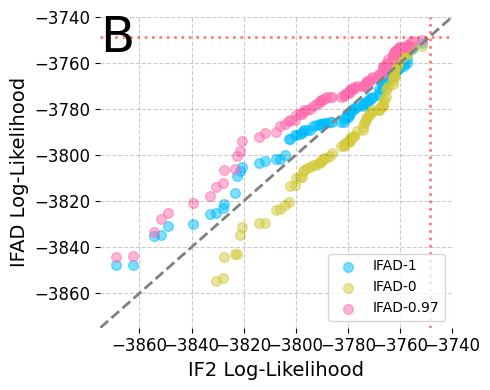

In [13]:
# IF2 0.95
plt.figure(figsize=(5,4))
# Overall paired searches, our IF2
plt.scatter(mifs.sort_values(), runs[1.0].sort_values(), marker='o', alpha=0.5,
            label='IFAD-1')
plt.scatter(mifs.sort_values(), runs[0.0].sort_values(), marker='o', alpha=0.5,
            label='IFAD-0')
plt.scatter(mifs.sort_values(), runs[0.97].sort_values(), marker='o', alpha=0.5,
            label='IFAD-0.97')
lo, hi = -3875, -3740
plt.xlim(lo,hi)
plt.ylim(lo,hi)
plt.plot([lo, hi], [lo, hi], linestyle='--', color='grey')
plt.axhline(-3748.5, linestyle='dotted', color='r', alpha=0.5)
plt.axvline(-3748.5, linestyle='dotted', color='r', alpha=0.5)

#plt.title('IFAD v.s. IF2, Paired Searches')

plt.xlabel('IF2 Log-Likelihood')
plt.ylabel('IFAD Log-Likelihood')
plt.legend()
plt.tight_layout()
# put horizontal and vertical lines at 3748.5
plt.text(-3875, -3755, 'B', fontsize=36)

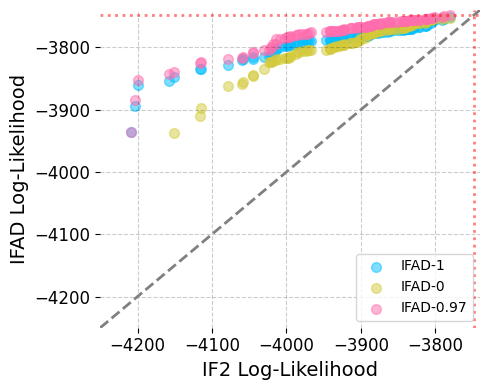

In [4]:
# IF2 0.95
plt.figure(figsize=(5,4))
# Overall paired searches, our IF2
plt.scatter(mifs.sort_values(), runs[1.0].sort_values(), marker='o', alpha=0.5,
            label='IFAD-1')
plt.scatter(mifs.sort_values(), runs[0.0].sort_values(), marker='o', alpha=0.5,
            label='IFAD-0')
plt.scatter(mifs.sort_values(), runs[0.97].sort_values(), marker='o', alpha=0.5,
            label='IFAD-0.97')
lo, hi = -4250, -3740
plt.xlim(lo,hi)
plt.ylim(lo,hi)
plt.plot([lo, hi], [lo, hi], linestyle='--', color='grey')
plt.axhline(-3748.5, linestyle='dotted', color='r', alpha=0.5)
plt.axvline(-3748.5, linestyle='dotted', color='r', alpha=0.5)

#plt.title('IFAD v.s. IF2, Paired Searches')

plt.xlabel('IF2 Log-Likelihood')
plt.ylabel('IFAD Log-Likelihood')
plt.legend()
plt.tight_layout()
# put horizontal and vertical lines at 3748.5
#plt.text(-3835, -3755, 'A', fontsize=36)

/home/kevin/anaconda3/envs/313/lib/python3.13/site-packages/ptitprince/PtitPrince.py:1070: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/home/kevin/anaconda3/envs/313/lib/python3.13/site-packages/ptitprince/PtitPrince.py:1070: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(
/home/kevin/anaconda3/envs/313/lib/python3.13/site-packages/ptitprince/PtitPrince.py:779: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.stripplot(


Text(-3765, 0, 'B')

<Figure size 500x400 with 0 Axes>

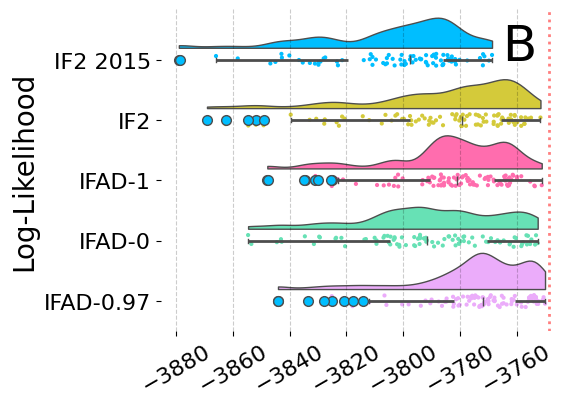

In [18]:
#IF2 0.95
import pyreadr
from scipy.special import logsumexp
import seaborn as sns
plt.style.use('matplotlibrc')
plt.figure(figsize=(5,4))
result = pyreadr.read_r('cholera-mif1-mif2.rda')

length = len(mifs)
data = pd.DataFrame({'IF2 2015': np.pad(logsumexp(result['m2.lik'], axis=0)[:length], 
                                        (0,max(0,length-100)), constant_values=np.nan),
              'IF2': mifs,    
              'IFAD-1': runs[1.0],
              'IFAD-0' : runs[0.0],
              'IFAD-0.97' : runs[0.97]})


dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = 0.2
pal = sns.color_palette([tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4)) for h in ['00BEFF', 'D4CA3A', 'FF6DAE', '67E1B5', 'EBACFA', 
                                             '9E9E9E', 'F1988E', '5DB15A', 'E28544', '52B8AA']], 10)
fig, ax = plt.subplots(figsize=(7/1.2, 5/1.2))

ax=pt.RainCloud(x = 'variable', y = 'value', 
                data = data[data>-3900].melt(), bw = sigma,
                palette=pal,
                 width_viol = 1.2, ax = ax, orient = ort
                 )
plt.xlabel('')
plt.ylabel('Log-Likelihood')


plt.axvline(-3748.5, linestyle='dotted', color='r', alpha=0.5)
plt.ylabel('Log-Likelihood', fontsize=20)
plt.xticks(rotation=30, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
#plt.title('Boxplot Comparison of Performance, Best of 10 Runs')
plt.tight_layout()
plt.text(-3765, 0, 'B', fontsize=36)

Text(18, -3754, 'A')

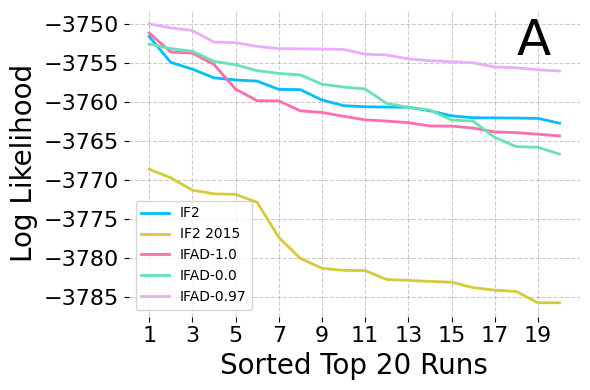

In [64]:
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(np.arange(1,21), np.sort(mifs)[-20:][::-1], label='IF2')
plt.plot(np.arange(1,21), np.sort(data['IF2 2015'])[-20:][::-1], label='IF2 2015')
df = runs.transform(np.sort).iloc[-20:][[1.0, 0.0, 0.97]][::-1].reset_index(drop=True)
df.columns = ['IFAD-' + str(c) for c in df.columns]
df.index = df.index + 1
df.plot(ax=ax)

plt.ylabel('Log Likelihood', fontsize=20)
plt.xlabel('Sorted Top 20 Runs', fontsize=20)
plt.legend()
plt.xticks(ticks = np.arange(1,21,2), rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
# #plt.title('Boxplot Comparison of Performance, Best of 10 Runs')
plt.tight_layout()
plt.text(18, -3754, 'A', fontsize=36)

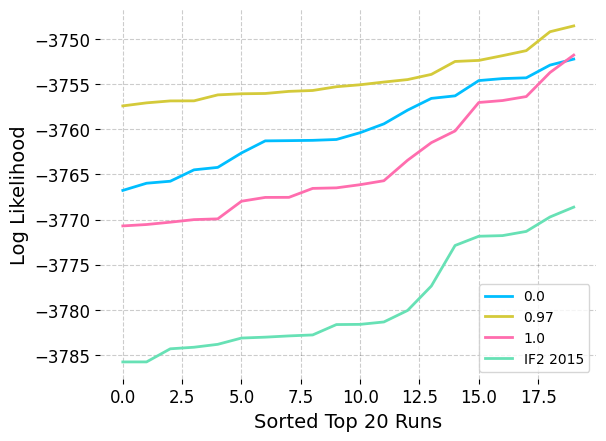

In [33]:
runs.transform(np.sort).iloc[-20:].reset_index(drop=True).plot()
plt.plot(np.sort(data['IF2 2015'])[-20:], label='IF2 2015')
plt.ylabel('Log Likelihood')
plt.xlabel('Sorted Top 20 Runs')
plt.legend()

In [16]:
mifs.sort_values()

39   -4722.377441
9    -4209.160645
11   -4202.743652
82   -4199.044922
95   -4158.128418
         ...     
31   -3802.980713
35   -3801.384033
89   -3791.583984
99   -3787.714111
6    -3779.989258
Name: logLik, Length: 100, dtype: float64

In [12]:
runs.transform(np.sort)

alpha,0.00,0.97,1.00
0,-24867.998047,-24867.998047,-24867.998047
1,-24867.998047,-3936.072754,-3935.608887
2,-24867.998047,-3883.862793,-3894.588867
3,-24867.998047,-3852.562744,-3860.053955
4,-24867.998047,-3842.776855,-3853.530762
...,...,...,...
95,-3754.594482,-3752.358398,-3757.023926
96,-3754.374268,-3751.831543,-3756.807861
97,-3754.289551,-3751.274658,-3756.367188
98,-3752.878906,-3749.177979,-3753.700439


In [8]:
mifs.sort_values()

39   -4722.377441
9    -4209.160645
11   -4202.743652
82   -4199.044922
95   -4158.128418
         ...     
31   -3802.980713
35   -3801.384033
89   -3791.583984
99   -3787.714111
6    -3779.989258
Name: logLik, Length: 100, dtype: float64